<a href="https://colab.research.google.com/github/mugambiian/Pancreatic-cancer-study/blob/main/Cancer_survival_rates_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat

In [ ]:
df= pd.read_csv('/content/KNH_data var.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Card_No                                    64 non-null     int64  
 1   Age                                        64 non-null     int64  
 2   Gender                                     64 non-null     object 
 3   marital_status                             64 non-null     object 
 4   Education                                  64 non-null     object 
 5   occupation                                 64 non-null     object 
 6   Subsance_use                               64 non-null     object 
 7   Family_Histroy_cancer                      64 non-null     object 
 8   Histological_type                          64 non-null     object 
 9   Location_of_cancer                         64 non-null     object 
 10  stage_cancer                

In [ ]:
df_encoded=pd.read_csv('/content/KNH_data.csv')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Card_No                                    64 non-null     int64  
 1   Age                                        64 non-null     int64  
 2   Gender                                     64 non-null     int64  
 3   marital_status                             64 non-null     int64  
 4   Education                                  64 non-null     int64  
 5   occupation                                 64 non-null     object 
 6   Subsance_use                               64 non-null     int64  
 7   Family_Histroy_cancer                      64 non-null     int64  
 8   Histological_type                          64 non-null     int64  
 9   Location_of_cancer                         64 non-null     int64  
 10  stage_cancer                

In [ ]:
df.head()

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,1,66,female,married,illterate,unemployed,None,No,Adenocarcinoma,Head,stage II,absent,,,,,,zero,surgery,,,,,,Regressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Complete remission,2.0
1,2,39,male,married,teritary,private employee,smoking cigarette,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),10,,,,Progression of the disease,1.0
2,3,80,female,widowed,illterate,unemployed,None,No,Adenocarcinoma,Head,stage III,present,yes,No,Yes,,No,two,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Non-response,2.0
3,4,54,male,Divorced,teritary,private employee,None,No,Adenocarcinoma,Head,stage III,present,no,Yes,No,,No,one,Chemotherapy,No,FOLFIRI,6,,<5,Regressed,Present,119,No,,Censured(Survived or Unknown status),84,,,7,Partial remission,1.0
4,5,62,male,married,illterate,unemployed,None,No,Adenocarcinoma,Tail,stage IV,absent,,,,,,zero,Pallative care,,,,Tramadol+plasil,,Progressed,Present,999,Yes,liver,Censured(Survived or Unknown status),1,1,1,,Progression of the disease,2.0


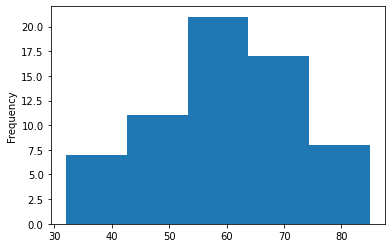

In [ ]:
age=df['Age']
#print(age)
age.plot(kind='hist',bins=5)

stage III    33
stage IV     23
stage II      5
stage I       3
Name: stage_cancer, dtype: int64


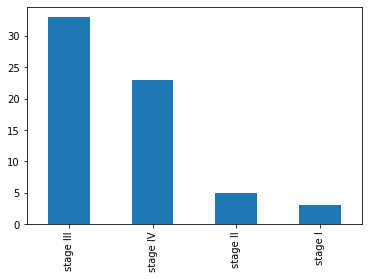

In [ ]:
stage=df['stage_cancer'].value_counts()
print(stage)
stage.plot(kind='bar')

Pallative care                       31
Chemotherapy                         20
Combination therapy                   6
surgery                               5
Treatment refusal/missing regimen     2
Name: Treatment_Regimen, dtype: int64


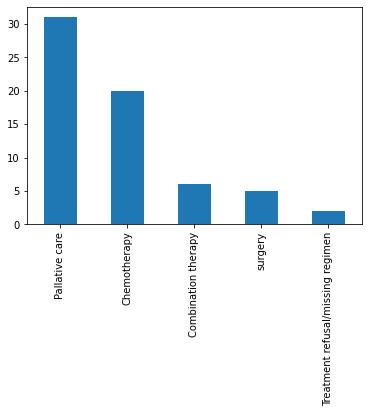

In [ ]:
treatment=df['Treatment_Regimen'].value_counts()
print(treatment)
treatment.plot(kind='bar')

female    34
male      30
Name: Gender, dtype: int64


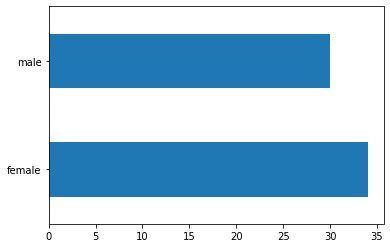

In [ ]:
gender=df['Gender'].value_counts()
print(gender)
gender.plot(kind='barh')

absent     32
present    32
Name: comorbidity, dtype: int64


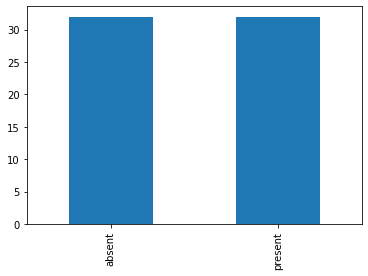

In [ ]:
commobidity=df['comorbidity'].value_counts()
print(commobidity)
commobidity.plot(kind='bar')

In [ ]:
df['Age'].describe()

count    64.000000
mean     60.375000
std      12.614554
min      32.000000
25%      52.750000
50%      60.000000
75%      70.000000
max      85.000000
Name: Age, dtype: float64

In [ ]:
skw=df['Age'].skew()
print(skw)
krt=df['Age'].kurt()
print(krt)

-0.09634801945101844
-0.39111663964167276


Bivariate Analysis

In [ ]:
df.isnull().value_counts()

Card_No  Age    Gender  marital_status  Education  occupation  Subsance_use  Family_Histroy_cancer  Histological_type  Location_of_cancer  stage_cancer  comorbidity  Hypertension  RVD    DM     COPD   DVT    NO_comorbdity  Treatment_Regimen  Any_Regimen_change  Types_of_chemo_regimen  No_cycles_chemo  Type_pallative_care  No_drugs_given  Size_Tumor  Tumor_markers  Type_Tumor_markers  Distant_Metastasis  Site_Metastasis  Status  Survival_time  Metastasis_free_survival  Cancer_specific_survival_after_Metastasis  Time_Recurrence  Status_Remission  Age_categories
False    False  False   False           False      False       False         False                  False              False               False         False        False         False  False  False  False  False          False              False               False                   False            False                False           False       False          False               False               False            False   Fa

In [ ]:
df.drop_duplicates()

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,1,66,female,married,illterate,unemployed,None,No,Adenocarcinoma,Head,stage II,absent,,,,,,zero,surgery,,,,,,Regressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Complete remission,2.0
1,2,39,male,married,teritary,private employee,smoking cigarette,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),10,,,,Progression of the disease,1.0
2,3,80,female,widowed,illterate,unemployed,None,No,Adenocarcinoma,Head,stage III,present,yes,No,Yes,,No,two,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Non-response,2.0
3,4,54,male,Divorced,teritary,private employee,None,No,Adenocarcinoma,Head,stage III,present,no,Yes,No,,No,one,Chemotherapy,No,FOLFIRI,6,,<5,Regressed,Present,119,No,,Censured(Survived or Unknown status),84,,,7,Partial remission,1.0
4,5,62,male,married,illterate,unemployed,None,No,Adenocarcinoma,Tail,stage IV,absent,,,,,,zero,Pallative care,,,,Tramadol+plasil,,Progressed,Present,999,Yes,liver,Censured(Survived or Unknown status),1,1,1,,Progression of the disease,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,73,female,married,secondary,unemployed,None,No,Adenocarcinoma,Tail,stage III,present,yes,No,No,No,No,one,Treatment refusal/missing regimen,,,,,,Progressed,Absent,,No,,Censured(Survived or Unknown status),6,,,,Progression of the disease,2.0
60,60,78,female,widowed,secondary,unemployed,None,No,Adenocarcinoma,Head,stage IV,present,yes,No,No,No,No,one,Pallative care,,,,Tramadol+plasil+vit K,,Progressed,Present,315,Yes,liver,death,10,6,4,,Progression of the disease,2.0
61,61,83,male,married,teritary,retired,Alcohol,No,Adenocarcinoma,Head,stage IV,present,no,No,Yes,No,No,one,Pallative care,,,,ERCP,,Progressed,Absent,,Yes,liver,Censured(Survived or Unknown status),13,8,5,,Progression of the disease,2.0
62,62,85,female,widowed,teritary,retired,None,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Chemotherapy,No,FOLFRINOX,7,,<5,No Change,Absent,,,,Censured(Survived or Unknown status),9,,,,Progression of the disease,2.0


In [ ]:
df[:5]

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,1,66,female,married,illterate,unemployed,None,No,Adenocarcinoma,Head,stage II,absent,,,,,,zero,surgery,,,,,,Regressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Complete remission,2.0
1,2,39,male,married,teritary,private employee,smoking cigarette,No,Adenocarcinoma,Head,stage III,absent,,,,,,zero,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),10,,,,Progression of the disease,1.0
2,3,80,female,widowed,illterate,unemployed,None,No,Adenocarcinoma,Head,stage III,present,yes,No,Yes,,No,two,Pallative care,,,,ERCP,,Progressed,Absent,,No,,Censured(Survived or Unknown status),4,,,,Non-response,2.0
3,4,54,male,Divorced,teritary,private employee,None,No,Adenocarcinoma,Head,stage III,present,no,Yes,No,,No,one,Chemotherapy,No,FOLFIRI,6,,<5,Regressed,Present,119,No,,Censured(Survived or Unknown status),84,,,7,Partial remission,1.0
4,5,62,male,married,illterate,unemployed,None,No,Adenocarcinoma,Tail,stage IV,absent,,,,,,zero,Pallative care,,,,Tramadol+plasil,,Progressed,Present,999,Yes,liver,Censured(Survived or Unknown status),1,1,1,,Progression of the disease,2.0


In [ ]:
#df = df['Status'].applymap(lambda x: str(x).rstrip('(Survived or Unknown status)'))

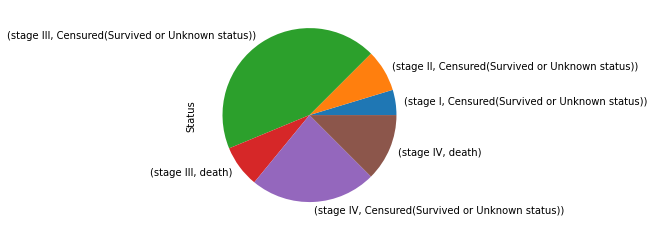

In [ ]:
x=df.groupby('stage_cancer')
x1=x['Status'].value_counts()
x1.plot(kind='pie')

In [ ]:
x=df.groupby('stage_cancer')
x['Status'].value_counts()

stage_cancer  Status                              
stage I       Censured(Survived or Unknown status)     3
stage II      Censured(Survived or Unknown status)     5
stage III     Censured(Survived or Unknown status)    28
              death                                    5
stage IV      Censured(Survived or Unknown status)    15
              death                                    8
Name: Status, dtype: int64

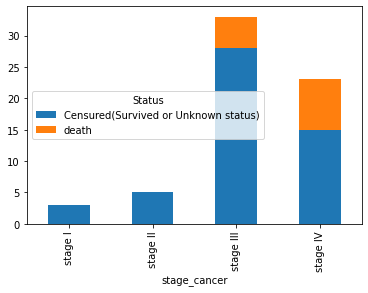

In [ ]:
df1=df.groupby('stage_cancer')
df1['Status'].value_counts().unstack().plot.bar(stacked=True)

In [ ]:
x=df.groupby('stage_cancer')
x['Status_Remission'].value_counts()

stage_cancer  Status_Remission          
stage I       Complete remission             1
              Non-response                   1
              Progression of the disease     1
stage II      Complete remission             2
              Partial remission              2
              Non-response                   1
stage III     Progression of the disease    24
              Non-response                   4
              Partial remission              4
              .                              1
stage IV      Progression of the disease    23
Name: Status_Remission, dtype: int64

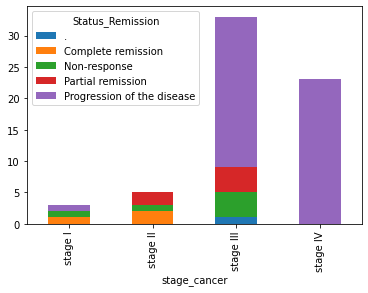

In [ ]:
df1=df.groupby('stage_cancer')
df1['Status_Remission'].value_counts().unstack().plot.bar(stacked=True)

In [ ]:
aa=df.groupby('comorbidity')
aa['Status_Remission'].value_counts()

comorbidity  Status_Remission          
absent       Progression of the disease    20
             Non-response                   5
             Complete remission             3
             Partial remission              3
             .                              1
present      Progression of the disease    28
             Partial remission              3
             Non-response                   1
Name: Status_Remission, dtype: int64

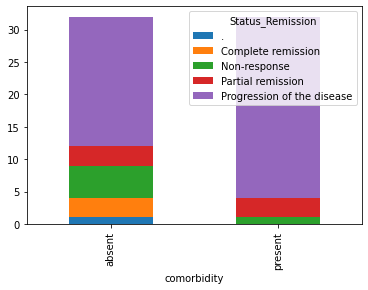

In [ ]:
df1=df.groupby('comorbidity')
df1['Status_Remission'].value_counts().unstack().plot.bar(stacked=True,legend='center')

In [ ]:
a=df['comorbidity']
r=df['Status_Remission']
pd.crosstab(a,r,normalize='columns')

Status_Remission,.,Complete remission,Non-response,Partial remission,Progression of the disease
comorbidity,,,,,
absent,1.0,1.0,0.833333,0.5,0.416667
present,0.0,0.0,0.166667,0.5,0.583333


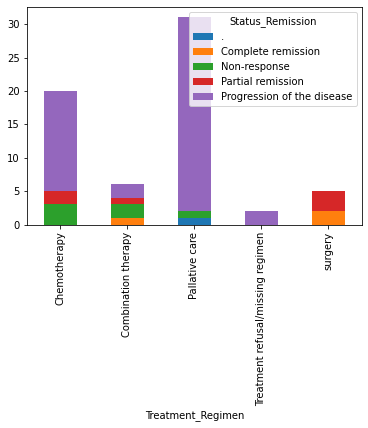

In [ ]:
df1=df.groupby('Treatment_Regimen')
df1['Status_Remission'].value_counts().unstack().plot.bar(stacked=True)

In [ ]:
pd.crosstab(df['Treatment_Regimen'],df['Status_Remission'],normalize='index')

Status_Remission,.,Complete remission,Non-response,Partial remission,Progression of the disease
Treatment_Regimen,,,,,
Chemotherapy,0.000000,0.000000,0.150000,0.100000,0.750000
Combination therapy,0.000000,0.166667,0.333333,0.166667,0.333333
Pallative care,0.032258,0.000000,0.032258,0.000000,0.935484
Treatment refusal/missing regimen,0.000000,0.000000,0.000000,0.000000,1.000000
surgery,0.000000,0.400000,0.000000,0.600000,0.000000


In [ ]:
df_encoded.drop(df_encoded.loc[df_encoded['Status_Remission']=='.'].index, inplace=True)


In [ ]:
df_encoded['Status_Remission'].value_counts()

4    48
2     6
3     6
1     3
Name: Status_Remission, dtype: int64

In [ ]:
x=df.groupby('comorbidity')
x['Status'].value_counts()

comorbidity  Status                              
absent       Censured(Survived or Unknown status)    28
             death                                    4
present      Censured(Survived or Unknown status)    23
             death                                    9
Name: Status, dtype: int64

In [ ]:
x=df.groupby(['stage_cancer','Treatment_Regimen'])
x['Status'].value_counts()

stage_cancer  Treatment_Regimen                  Status                              
stage I       Combination therapy                Censured(Survived or Unknown status)     3
stage II      Chemotherapy                       Censured(Survived or Unknown status)     1
              Combination therapy                Censured(Survived or Unknown status)     1
              surgery                            Censured(Survived or Unknown status)     3
stage III     Chemotherapy                       Censured(Survived or Unknown status)     9
                                                 death                                    1
              Combination therapy                Censured(Survived or Unknown status)     1
              Pallative care                     Censured(Survived or Unknown status)    16
                                                 death                                    3
              Treatment refusal/missing regimen  Censured(Survived or Unknown status) 

In [ ]:
df_encoded

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,1,66,1,2,4,5,4,2,1,1,2,2,,,,,,0,3,,,,,,1,0,,0,,0,4,,,,1,2.0
1,2,39,2,2,3,8,2,2,1,1,3,2,,,,,,0,5,,,,1,,2,0,,0,,0,10,,,,4,1.0
2,3,80,1,4,4,5,4,2,1,1,3,1,1,0,1,,0,2,5,,,,1,,2,0,,0,,0,4,,,,3,2.0
3,4,54,2,3,3,8,4,2,1,1,3,1,0,1,0,,0,1,2,.00,6,6,,1,1,1,119,0,,0,84,,,7,2,1.0
4,5,62,2,2,4,5,4,2,1,2,4,2,,,,,,0,5,,,,4,,2,1,999,1,1,0,1,1,1,,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,73,1,2,2,5,4,2,1,2,3,1,1,0,0,0,0,1,6,,,,,,2,0,,0,,0,6,,,,4,2.0
60,60,78,1,4,2,5,4,2,1,1,4,1,1,0,0,0,0,1,5,,,,3,,2,1,315,1,1,1,10,6,4,,4,2.0
61,61,83,2,2,3,3,1,2,1,1,4,1,0,0,1,0,0,1,5,,,,1,,2,0,,1,1,0,13,8,5,,4,2.0
62,62,85,1,4,3,3,4,2,1,1,3,2,,,,,,0,2,.00,1,7,,1,3,0,,,,0,9,,,,4,2.0


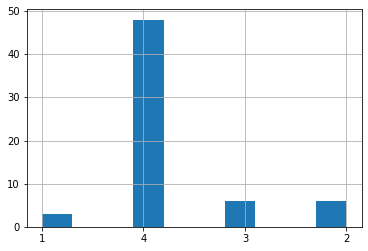

In [ ]:
  df_encoded['Status_Remission'].hist()

In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df_encoded['comorbidity'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.636, p=0.000
Sample does not look Gaussian


In [ ]:
df_encoded['comorbidity']

0     2
1     2
2     1
3     1
4     2
     ..
59    1
60    1
61    1
62    2
63    1
Name: comorbidity, Length: 63, dtype: int64

In [ ]:
abs=df_encoded[df_encoded['stage_cancer']==1]
absent=abs['Status_Remission'].sample(31)

pre=df_encoded[df_encoded['stage_cancer']==4]
present=pre['Status_Remission'].sample(31)


ValueError: ignored

In [ ]:
pre['Status_Remission']

In [ ]:
abs=df_encoded.groupby(df_encoded['']=='absent')
absent=abs['Status_Remission']
pre=df_encoded.groupby(df_encoded['comorbidity']=='present')
present=pre['Status_Remission']

In [ ]:
absent=pd.to_numeric(absent)
present=pd.to_numeric(present)

In [ ]:
# Calculate the statistic and p value
from scipy.stats import wilcoxon
# compare samples
stat, p = wilcoxon(absent,present)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Fail to reject H0')
else:
    print('Reject H0')

Stratified sampling

In [ ]:
df_encoded

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
0,1,66,1,2,4,5,4,2,1,1,2,2,,,,,,0,3,,,,,,1,0,,0,,0,4,,,,1,2.0
1,2,39,2,2,3,8,2,2,1,1,3,2,,,,,,0,5,,,,1,,2,0,,0,,0,10,,,,4,1.0
2,3,80,1,4,4,5,4,2,1,1,3,1,1,0,1,,0,2,5,,,,1,,2,0,,0,,0,4,,,,3,2.0
3,4,54,2,3,3,8,4,2,1,1,3,1,0,1,0,,0,1,2,.00,6,6,,1,1,1,119,0,,0,84,,,7,2,1.0
4,5,62,2,2,4,5,4,2,1,2,4,2,,,,,,0,5,,,,4,,2,1,999,1,1,0,1,1,1,,4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,59,73,1,2,2,5,4,2,1,2,3,1,1,0,0,0,0,1,6,,,,,,2,0,,0,,0,6,,,,4,2.0
60,60,78,1,4,2,5,4,2,1,1,4,1,1,0,0,0,0,1,5,,,,3,,2,1,315,1,1,1,10,6,4,,4,2.0
61,61,83,2,2,3,3,1,2,1,1,4,1,0,0,1,0,0,1,5,,,,1,,2,0,,1,1,0,13,8,5,,4,2.0
62,62,85,1,4,3,3,4,2,1,1,3,2,,,,,,0,2,.00,1,7,,1,3,0,,,,0,9,,,,4,2.0


In [ ]:

df_encoded['Status_Remission']=pd.to_numeric(df_encoded['Status_Remission'])

In [ ]:
df2 = df_encoded.groupby('comorbidity', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=1))
df2

,Card_No,Age,Gender,marital_status,Education,occupation,Subsance_use,Family_Histroy_cancer,Histological_type,Location_of_cancer,stage_cancer,comorbidity,Hypertension,RVD,DM,COPD,DVT,NO_comorbdity,Treatment_Regimen,Any_Regimen_change,Types_of_chemo_regimen,No_cycles_chemo,Type_pallative_care,No_drugs_given,Size_Tumor,Tumor_markers,Type_Tumor_markers,Distant_Metastasis,Site_Metastasis,Status,Survival_time,Metastasis_free_survival,Cancer_specific_survival_after_Metastasis,Time_Recurrence,Status_Remission,Age_categories
47,47,70,1,2,2,1,4,2,1,1,4,1,0,1,0,0,0,1,6,,,,,,2,0,,1,1,0,4,,,,4,2.0
52,52,70,1,2,3,2,4,2,1,1,2,1,0,0,1,0,0,1,2,.00,8,6,,,2,0,,0,,0,10,,,,2,2.0
23,24,42,2,1,3,8,2,2,1,3,4,1,1,0,0,,0,1,2,.00,2,4,,,1,0,,1,1,0,5,5,5,,4,1.0
19,20,70,2,3,3,5,2,2,1,1,4,1,0,0,0,,1,1,2,.00,2,2,,1,2,0,,1,1,1,5,5,5,,4,2.0
17,18,52,1,2,1,6,4,2,1,1,2,1,0,0,1,,0,1,3,,,,,,1,0,,0,,0,4,,,,2,1.0
32,32,48,2,2,3,8,2,2,1,1,4,1,0,1,1,,0,2,2,.00,1,12,,1,3,0,,1,2,0,17,10,7,,4,1.0
59,59,73,1,2,2,5,4,2,1,2,3,1,1,0,0,0,0,1,6,,,,,,2,0,,0,,0,6,,,,4,2.0
38,38,53,1,2,3,2,4,2,4,3,4,1,0,0,0,,1,1,2,.00,0,6,,1,2,0,,1,1,0,9,,,,4,1.0
39,39,55,1,2,3,2,4,2,1,2,4,1,0,0,1,,0,1,2,.00,2,6,,1,2,0,,1,3,0,10,2,8,,4,1.0
3,4,54,2,3,3,8,4,2,1,1,3,1,0,1,0,,0,1,2,.00,6,6,,1,1,1,119,0,,0,84,,,7,2,1.0


In [ ]:
# sample mean
sm= df2['Status_Remission'].mean()
sm

3.59375

In [ ]:
# sample standard deviation
sd = df2['Status_Remission'].std()
sd

0.8370214087522955

In [ ]:
#population mean
pm=df_encoded['Status_Remission'].mean()
pm


3.5714285714285716

In [ ]:
# calculating the z-score
zscore = (sm-pm) / sd
zscore

0.026667691337431597

In [ ]:
#calculating the p value
import scipy.stats as stats
from scipy.stats import norm
pvalue = stats.norm.cdf(zscore)
pvalue

0.5106376087297363

In [ ]:
df3 = df_encoded.groupby('stage_cancer', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=1))
df3

# sample mean
sm= df3['Status_Remission'].mean()
sm

# sample standard deviation
sd = df3['Status_Remission'].std()
sd

#population mean
pm=df3['Status_Remission'].mean()
pm

# calculating the z-score
zscore = (sm-pm) / sd
zscore

#calculating the p value
import scipy.stats as stats
from scipy.stats import norm
pvalue = stats.norm.cdf(zscore)
pvalue



0.5

In [ ]:
#interpretation of the p value
if pvalue < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis
